<a href="https://colab.research.google.com/github/vinybrasil/CiDAMO/blob/master/projeto_relmo/customers/matriz_quantidade_preco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#gerar um dataset com as quantidades e total gasto
data_quantidades = pd.read_csv("/content/drive/My Drive/projeto_relmo/matriz_de_quantidades.csv", index_col=0) 

In [ ]:
data_quantidades

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,RECIPE BOX WITH METAL HEART,DOORMAT NEW ENGLAND,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,BATH BUILDING BLOCK WORD,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,PANDA AND BUNNIES STICKER SHEET,STARS GIFT TAPE,INFLATABLE POLITICAL GLOBE,VINTAGE HEADS AND TAILS CARD GAME,SET/2 RED RETROSPOT TEA TOWELS,ROUND SNACK BOXES SET OF4 WOODLAND,SPACEBOY LUNCH BOX,LUNCH BOX I LOVE LONDON,CIRCUS PARADE LUNCH BOX,CHARLOTTE BAG DOLLY GIRL DESIGN,RED TOADSTOOL LED NIGHT LIGHT,...,PAISLEY PARK CARD,PACK 3 BOXES CHRISTMAS PANETTONE,PACK 3 BOXES BIRD PANETTONE,COLOURED GLASS STAR T-LIGHT HOLDER,CRYSTAL CZECH CROSS PHONE CHARM,12 HANGING EGGS HAND PAINTED,SET OF 6 EASTER RAINBOW CHICKS,DUSTY PINK CHRISTMAS TREE 60CM,IVORY RETRO KITCHEN WALL CLOCK,PACK OF 6 PANETTONE GIFT BOXES,CAT WITH SUNGLASSES BLANK CARD,BLUE RETRO KITCHEN WALL CLOCK,RED RETRO KITCHEN WALL CLOCK,WHITE MOROCCAN METAL LANTERN,HAND PAINTED HANGING EASTER EGG,UNION JACK HOT WATER BOTTLE,WHITE STONE/CRYSTAL EARRINGS,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,PAINT YOUR OWN EGGS IN CRATE,BICYCLE PUNCTURE REPAIR KIT,CLASSIC BICYCLE CLIPS,CROCHET LILAC/RED BEAR KEYRING,SNACK TRAY RED GINGHAM,SNACK TRAY HAPPY FOREST,SNACK TRAY PAISLEY PARK,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,GIN AND TONIC DIET METAL SIGN,SET OF 6 RIBBONS PARTY,SILVER AND BLACK ORBIT NECKLACE,"LETTER ""F"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",PINK CRYSTAL SKULL PHONE CHARM,CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
17850.0,122,122,108,110,104,42,102,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13047.0,23,0,0,0,0,0,0,0,0,32,12,12,12,6,35,9,4,12,15,4,12,30,3,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,84,92,12,168,48,24,18,102,36,36,24,20,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0
13748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
total = data_quantidades.sum(axis=1)

In [ ]:
type(total)

pandas.core.series.Series

In [ ]:
customers = data_quantidades.index

In [ ]:
type(customers)

pandas.core.indexes.numeric.Float64Index

In [ ]:
matriz_quantidade_preco = pd.DataFrame(total, index=data_quantidades.index)

In [ ]:
matriz_quantidade_preco #matriz com a quantidade total consumida

,0
17850.0,1693
13047.0,1355
12583.0,5009
13748.0,439
15100.0,58
...,...
13436.0,76
15520.0,314
13298.0,96
14569.0,79


In [ ]:
matriz_precos = pd.DataFrame(index=data_quantidades.index, columns=data_quantidades.columns)

In [ ]:
matriz_precos = matriz_precos.fillna(0)

In [ ]:
matriz_precos

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,RECIPE BOX WITH METAL HEART,DOORMAT NEW ENGLAND,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,BATH BUILDING BLOCK WORD,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,PANDA AND BUNNIES STICKER SHEET,STARS GIFT TAPE,INFLATABLE POLITICAL GLOBE,VINTAGE HEADS AND TAILS CARD GAME,SET/2 RED RETROSPOT TEA TOWELS,ROUND SNACK BOXES SET OF4 WOODLAND,SPACEBOY LUNCH BOX,LUNCH BOX I LOVE LONDON,CIRCUS PARADE LUNCH BOX,CHARLOTTE BAG DOLLY GIRL DESIGN,RED TOADSTOOL LED NIGHT LIGHT,...,PAISLEY PARK CARD,PACK 3 BOXES CHRISTMAS PANETTONE,PACK 3 BOXES BIRD PANETTONE,COLOURED GLASS STAR T-LIGHT HOLDER,CRYSTAL CZECH CROSS PHONE CHARM,12 HANGING EGGS HAND PAINTED,SET OF 6 EASTER RAINBOW CHICKS,DUSTY PINK CHRISTMAS TREE 60CM,IVORY RETRO KITCHEN WALL CLOCK,PACK OF 6 PANETTONE GIFT BOXES,CAT WITH SUNGLASSES BLANK CARD,BLUE RETRO KITCHEN WALL CLOCK,RED RETRO KITCHEN WALL CLOCK,WHITE MOROCCAN METAL LANTERN,HAND PAINTED HANGING EASTER EGG,UNION JACK HOT WATER BOTTLE,WHITE STONE/CRYSTAL EARRINGS,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,PAINT YOUR OWN EGGS IN CRATE,BICYCLE PUNCTURE REPAIR KIT,CLASSIC BICYCLE CLIPS,CROCHET LILAC/RED BEAR KEYRING,SNACK TRAY RED GINGHAM,SNACK TRAY HAPPY FOREST,SNACK TRAY PAISLEY PARK,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,GIN AND TONIC DIET METAL SIGN,SET OF 6 RIBBONS PARTY,SILVER AND BLACK ORBIT NECKLACE,"LETTER ""F"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",PINK CRYSTAL SKULL PHONE CHARM,CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
17850.0,80,107,110,100,100,75,125,55,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13047.0,0,0,0,0,0,0,0,0,0,54,12,12,30,9,25,14,19,17,17,31,31,25,14,14,14,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,90,45,10,15,40,30,53,70,46,46,46,17,39,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
data_precos = pd.read_csv("/content/drive/My Drive/projeto_relmo/DATA_SEMNA.csv")

In [ ]:
data_precos

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
z = 0
while z < len(data_precos):
    print('Lendo ', z, ' de ', len(data_precos) - 1, ' registros.')
    cliente = data_precos['CustomerID'][z]
    produto = data_precos['Description'][z]
    quantidade = data_precos['Quantity'][z] * data_precos['UnitPrice'][z]
    matriz_precos[produto][cliente] += quantidade
    z += 1

Streaming output truncated to the last 5000 lines.
Lendo  401830  de  406828  registros.
Lendo  401831  de  406828  registros.
Lendo  401832  de  406828  registros.
Lendo  401833  de  406828  registros.
Lendo  401834  de  406828  registros.
Lendo  401835  de  406828  registros.
Lendo  401836  de  406828  registros.
Lendo  401837  de  406828  registros.
Lendo  401838  de  406828  registros.
Lendo  401839  de  406828  registros.
Lendo  401840  de  406828  registros.
Lendo  401841  de  406828  registros.
Lendo  401842  de  406828  registros.
Lendo  401843  de  406828  registros.
Lendo  401844  de  406828  registros.
Lendo  401845  de  406828  registros.
Lendo  401846  de  406828  registros.
Lendo  401847  de  406828  registros.
Lendo  401848  de  406828  registros.
Lendo  401849  de  406828  registros.
Lendo  401850  de  406828  registros.
Lendo  401851  de  406828  registros.
Lendo  401852  de  406828  registros.
Lendo  401853  de  406828  registros.
Lendo  401854  de  406828  registros.

In [ ]:
matriz_precos

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,RECIPE BOX WITH METAL HEART,DOORMAT NEW ENGLAND,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,BATH BUILDING BLOCK WORD,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,PANDA AND BUNNIES STICKER SHEET,STARS GIFT TAPE,INFLATABLE POLITICAL GLOBE,VINTAGE HEADS AND TAILS CARD GAME,SET/2 RED RETROSPOT TEA TOWELS,ROUND SNACK BOXES SET OF4 WOODLAND,SPACEBOY LUNCH BOX,LUNCH BOX I LOVE LONDON,CIRCUS PARADE LUNCH BOX,CHARLOTTE BAG DOLLY GIRL DESIGN,RED TOADSTOOL LED NIGHT LIGHT,...,PAISLEY PARK CARD,PACK 3 BOXES CHRISTMAS PANETTONE,PACK 3 BOXES BIRD PANETTONE,COLOURED GLASS STAR T-LIGHT HOLDER,CRYSTAL CZECH CROSS PHONE CHARM,12 HANGING EGGS HAND PAINTED,SET OF 6 EASTER RAINBOW CHICKS,DUSTY PINK CHRISTMAS TREE 60CM,IVORY RETRO KITCHEN WALL CLOCK,PACK OF 6 PANETTONE GIFT BOXES,CAT WITH SUNGLASSES BLANK CARD,BLUE RETRO KITCHEN WALL CLOCK,RED RETRO KITCHEN WALL CLOCK,WHITE MOROCCAN METAL LANTERN,HAND PAINTED HANGING EASTER EGG,UNION JACK HOT WATER BOTTLE,WHITE STONE/CRYSTAL EARRINGS,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,PAINT YOUR OWN EGGS IN CRATE,BICYCLE PUNCTURE REPAIR KIT,CLASSIC BICYCLE CLIPS,CROCHET LILAC/RED BEAR KEYRING,SNACK TRAY RED GINGHAM,SNACK TRAY HAPPY FOREST,SNACK TRAY PAISLEY PARK,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,GIN AND TONIC DIET METAL SIGN,SET OF 6 RIBBONS PARTY,SILVER AND BLACK ORBIT NECKLACE,"LETTER ""F"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",PINK CRYSTAL SKULL PHONE CHARM,CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
17850.0,390,514,403,467,447,390,551,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13047.0,67,0,0,0,0,0,0,0,0,108,36,36,75,18,171,59,57,85,102,62,126,150,28,28,28,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,397,405,390,20,57,80,60,106,368,115,115,92,34,155,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0
13748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0

In [ ]:
matriz_quantidade_preco[1] = matriz_precos.sum(axis=1)

In [ ]:
matriz_quantidade_preco.to_csv("/content/drive/My Drive/projeto_relmo/matriz_quantidade_preco.csv")
matriz_quantidade_preco

,0,1
17850.0,1693,6629
13047.0,1355,3333
12583.0,5009,7941
13748.0,439,1140
15100.0,58,983
...,...,...
13436.0,76,192
15520.0,314,337
13298.0,96,360
14569.0,79,220


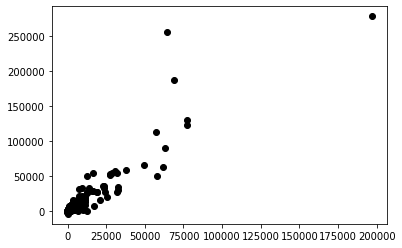

In [ ]:
plt.plot(matriz_quantidade_preco[0], matriz_quantidade_preco[1], 'o', color='black');

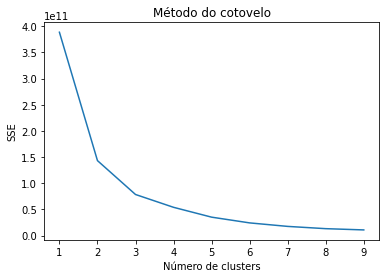

In [ ]:
arr = matriz_quantidade_preco.to_numpy()
erro = []
for i in range(1, 10):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=2)
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=2)
    kmeans.fit(arr)
    erro.append(kmeans.inertia_)
plt.plot(range(1, 10), erro)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=2)

In [ ]:
kmeans.fit(arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = kmeans.predict(arr)

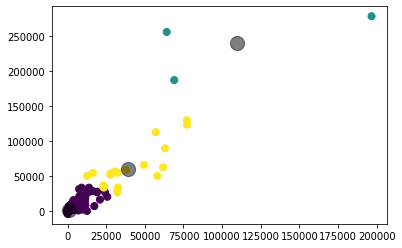

In [ ]:
plt.scatter(arr[:, 0], arr[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
d = matriz_quantidade_preco[matriz_quantidade_preco[1] > 150000]
d

,0,1
17450.0,69029,187345
18102.0,64122,256283
14646.0,196719,278796


In [ ]:
matriz_quantidade_preco2 

,0,1
17850.0,1693,6629
13047.0,1355,3333
12583.0,5009,7941
13748.0,439,1140
15100.0,58,983
...,...,...
13436.0,76,192
15520.0,314,337
13298.0,96,360
14569.0,79,220


In [ ]:
matriz_quantidade_preco2 = pd.read_excel('/content/drive/My Drive/projeto_relmo/matriz_quantidade_preco_sem_outlier.gsheet', index_col=0)

OSError: ignored

In [ ]:
matriz_quantidade_preco2

,0,1
17850.0,1693,6629
13047.0,1355,3333
12583.0,5009,7941
13748.0,439,1140
15100.0,58,983
...,...,...
13436.0,76,192
15520.0,314,337
13298.0,96,360
14569.0,79,220


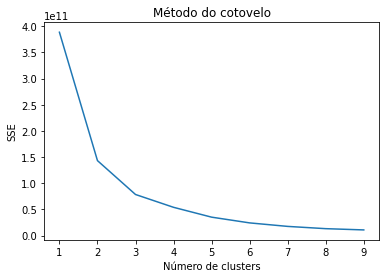

In [ ]:
arr = matriz_quantidade_preco2.to_numpy()
erro = []
for i in range(1, 10):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=2)
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=2)
    kmeans.fit(arr)
    erro.append(kmeans.inertia_)
plt.plot(range(1, 10), erro)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()